In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 计算逆矩阵
# numpy.linalg模块包含线性代数的函数。
# 使用这个模块，可以计算逆矩阵、求特征值、解线性方程组以及求解行列式等

# 求逆矩阵
A = np.mat("0 1 2;1 0 3;4 -3 8")
inverse = np.linalg.inv(A)

A, inverse, A.dot(inverse), A * inverse

(matrix([[ 0,  1,  2],
         [ 1,  0,  3],
         [ 4, -3,  8]]),
 matrix([[-4.5,  7. , -1.5],
         [-2. ,  4. , -1. ],
         [ 1.5, -2. ,  0.5]]),
 matrix([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
 matrix([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]))

In [4]:
# 求解线性方程组
A = np.mat("1 -2 1;0 2 -8;-4 5 9")
b = np.array([0, 8, -9])
x = np.linalg.solve(A, b)
x, np.dot(A, x), b.shape

(array([29., 16.,  3.]), matrix([[ 0.,  8., -9.]]), (3,))

In [5]:
# 特征值和特征向量
# 特征值（eigenvalue）即方程 Ax = ax 的根，是一个标量
# 特征向量（eigenvector）是关于特征值的向量

# eigvals函数求解特征值
A = np.mat("3 -2;1 0")
eigenvalue = np.linalg.eigvals(A)

# eig函数求解特征值和特征向量。
eigenvalues, eigenvectors = np.linalg.eig(A)

# Ax = ax
for i in range(len(eigenvalues)):
    print("left", np.dot(A, eigenvectors[:,i]))
    print("right", eigenvalues[i] * eigenvectors[:,i])
    
eigenvalue == eigenvalues,eigenvalues, eigenvectors

left [[1.78885438]
 [0.89442719]]
right [[1.78885438]
 [0.89442719]]
left [[0.70710678]
 [0.70710678]]
right [[0.70710678]
 [0.70710678]]


(array([ True,  True]),
 array([2., 1.]),
 matrix([[0.89442719, 0.70710678],
         [0.4472136 , 0.70710678]]))

In [6]:
# 奇异值分解
# SVD（Singular Value Decomposition，奇异值分解）是一种因子分解运算
# 将一个矩阵分解为3个矩阵的乘积。
# 在numpy.linalg模块中的svd函数可以对矩阵进行奇异值分解。
#该函数返回3个矩阵——U、Sigma和V，其中U和V是正交矩阵，Sigma包含输入矩阵的奇异值。

A = np.mat("4 11 14;8 7 -2")
U, Sigma, V = np.linalg.svd(A, full_matrices=False)
# 奇异值矩阵
Sigma =  np.diag(Sigma)

U, Sigma , V

(matrix([[ 0.9486833 , -0.31622777],
         [ 0.31622777,  0.9486833 ]]),
 array([[18.97366596,  0.        ],
        [ 0.        ,  9.48683298]]),
 matrix([[ 0.33333333,  0.66666667,  0.66666667],
         [ 0.66666667,  0.33333333, -0.66666667]]))

In [10]:
# 广义逆矩阵
# inv函数只接受方阵作为输入矩阵
# pinv函数没有这个限制
A = np.mat("4 11 14; 8 7 -2")
np.linalg.pinv(A), A * np.linalg.pinv(A)

(matrix([[-0.00555556,  0.07222222],
         [ 0.02222222,  0.04444444],
         [ 0.05555556, -0.05555556]]),
 matrix([[ 1.00000000e+00, -4.44089210e-16],
         [-1.66533454e-16,  1.00000000e+00]]))

In [11]:
# 计算矩阵的行列式
A = np.mat("3 4; 5 6")
np.linalg.det(A)

-2.0000000000000004

F:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
F:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


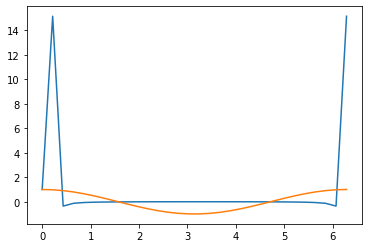

In [22]:
# 快速傅里叶变换
x = np.linspace(0, 2*np.pi, 30)
wave = np.cos(x)
# plt.plot(x, wave)

# fft函数进行傅里叶变换
transformed = np.fft.fft(wave)
plt.plot(x, transformed)

# 对变换后的结果应用ifft函数，可以近似的还原初始信号
y = np.fft.ifft(transformed)
plt.plot(x, y)

F:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
F:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


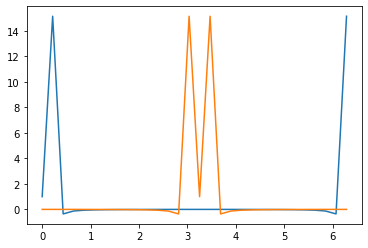

In [24]:
# 移频
# 使用fftshift函数
shifted = np.fft.fftshift(transformed)
plt.plot(x, transformed)
plt.plot(x, shifted)

[4 4 5 ... 2 5 4]
0 9


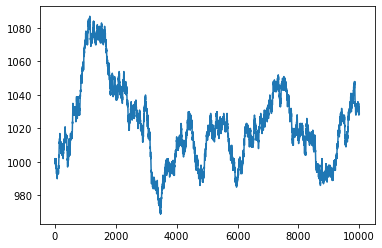

In [34]:
# 随机数
# 硬币赌博游戏(模拟随机走样)
cash = np.zeros(10000)
cash[0] = 1000 
outcome = np.random.binomial(9, 0.5, size=len(cash))
print(outcome)
print(outcome.min(), outcome.max())

for i in range(1, len(cash)):
    if outcome[i] < 5:
        cash[i] = cash[i - 1] - 1
    elif outcome[i] < 10:
        cash[i] = cash[i - 1] + 1
    else:
        raise AssertionError("Unexpected outcome " + outcome)

plt.plot(np.arange(len(cash)), cash)

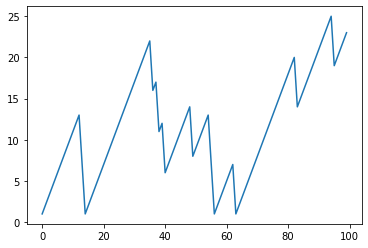

In [42]:
# 超几何分布
points = np.zeros(100)
outcomes = np.random.hypergeometric(25, 1, 3, size=len(points))
for i in range(len(points)):
    if outcomes[i] == 3:
        points[i] = points[i - 1] +1
    elif outcomes[i] == 2:
        points[i] = points[i - 1] - 6
    else:
        print(outcome[i])

plt.plot(np.arange(len(points)), points)

[ 0.23869705  0.30426867 -0.2374887  ...  0.59994058 -1.36292165
 -1.69152311]


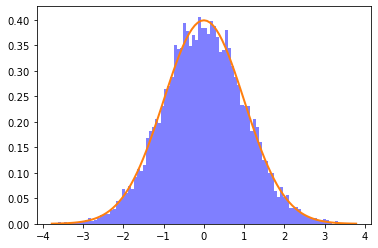

In [62]:
# 正态分布
N = 10000
normal_values = np.random.normal(size=N)
print(normal_values)

dummy, bins, dummy = plt.hist(normal_values, int(np.sqrt(N)), density=True, 
                              stacked=True, alpha=0.5, facecolor='blue') 
sigma = 1 
mu = 0 
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins -mu)**2 / (2 * sigma**2) ),lw=2) 
plt.show()

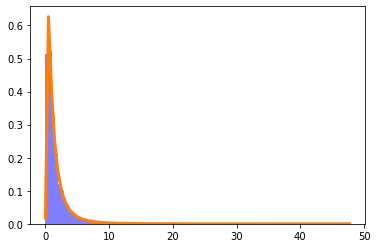

In [64]:
# 对数正态分布
N=10000 
lognormal_values = np.random.lognormal(size=N)

dummy, bins, dummy = plt.hist(lognormal_values,int(np.sqrt(N)), density=True, 
                              stacked=True, alpha=0.5, facecolor='blue') 
sigma = 1 
mu = 0 
x = np.linspace(min(bins), max(bins), len(bins)) 
pdf = np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x *sigma * np.sqrt(2 * np.pi)) 
plt.plot(x, pdf,lw=3) 
plt.show()